In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# import zipfile
# with zipfile.ZipFile('archive_sports.zip',"r") as zip_ref:
#     zip_ref.extractall("sports")

In [4]:
train_path = 'sports/train/'
test_path = 'sports/test/'

In [5]:
train_gen = ImageDataGenerator(rescale = 1/255)
test_gen = ImageDataGenerator(rescale = 1/255)

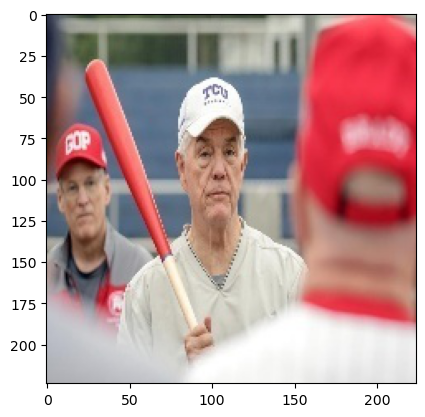

In [6]:
plt.imshow(plt.imread(train_path + 'baseball/001.jpg'));

In [7]:
train_data = train_gen.flow_from_directory(
    train_path,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [8]:
# model = Sequential()

# model.add(Conv2D(
#     filters=16,
#     kernel_size=(3,3),
#     activation='relu'))

# model.add(MaxPool2D(
#       pool_size=(2,2)))

# model.add(Flatten())
# # model.add(Dense(
# #     units=2,
# #     activation='relu'))

# # output layer
# model.add(Dense(
#     units=100,
#     activation='softmax'))

In [9]:
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# history = model.fit(
#     train_data,
#     batch_size=32,
#     validation_data=test_data,
#     epochs=1
# )

In [11]:
# train_preds = model.predict(train_data)
# test_preds = model.predict(test_data)

# #histograms
# plt.hist(train_preds)
# plt.show()
# plt.hist(test_preds)

In [12]:
# map off image generator

In [13]:
effnet = EfficientNetB0(include_top=False, weights='imagenet')

In [17]:
model = Sequential()
model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 100)               200       
                                                                 
Total params: 4,051,052
Trainable params: 4,009,029
Non-trainable params: 42,023
_______________________________________

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(train_data,
                    batch_size=10,
                    validation_data = test_data,
                    validation_batch_size=10,
                    epochs = 1)

425/425 [==============================] - 1614s 4s/step - loss: 4.4081 - accuracy: 0.0175 - val_loss: 6.8010 - val_accuracy: 0.0020


In [20]:
test_preds = model.predict(test_data)

16/16 [==============================] - 15s 786ms/step


In [28]:
y_preds = test_preds.argmax(axis=-1)

In [29]:
preds_dict = {v:k for k,v in test_data.class_indices.items()}

In [30]:
import pandas as pd

In [31]:
test_sports_preds = pd.Series(y_preds).map(preds_dict)

In [32]:
test_sports_preds[:5]

0         swimming
1            rugby
2     canoe slamon
3    nascar racing
4         swimming
dtype: object

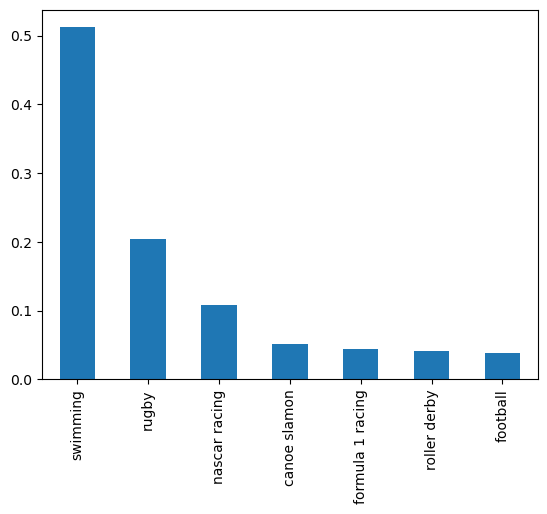

In [33]:
test_sports_preds.value_counts(normalize = True ).head(20).plot(kind='bar')
plt.xlabel
plt.show()

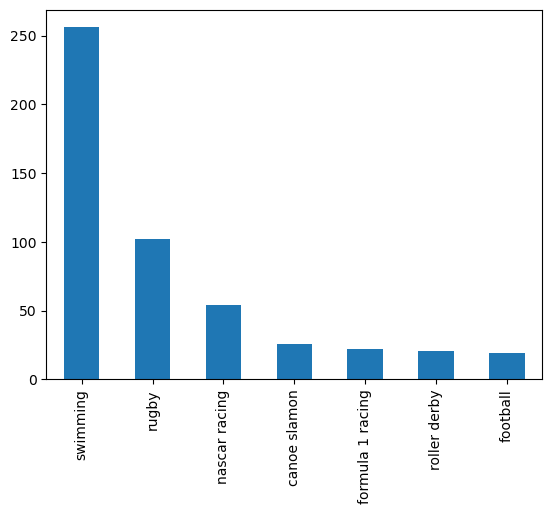

In [34]:
test_sports_preds.value_counts().head(20).plot(kind='bar')
plt.xlabel
plt.show()